In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train,x_test=x_train/255,x_test/255

2021-07-18 12:59:16.658241: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-18 12:59:16.658261: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [3]:
model=models.Sequential([
    layers.Conv2D(64,(3,3),activation='relu', input_shape=(28,28,1)),
    layers.MaxPool2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

2021-07-18 12:59:18.372577: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-18 12:59:18.407968: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-18 12:59:18.408007: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sumangole): /proc/driver/nvidia/version does not exist
2021-07-18 12:59:18.408543: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [6]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

2021-07-18 12:59:18.811868: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-18 12:59:18.812336: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1800000000 Hz


Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4379 - accuracy: 0.8415 - val_loss: 0.3510 - val_accuracy: 0.8716
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2931 - accuracy: 0.8925 - val_loss: 0.3027 - val_accuracy: 0.8869
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2492 - accuracy: 0.9083 - val_loss: 0.2751 - val_accuracy: 0.8988
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2165 - accuracy: 0.9189 - val_loss: 0.2630 - val_accuracy: 0.9045
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1911 - accuracy: 0.9288 - val_loss: 0.2654 - val_accuracy: 0.9022
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1678 - accuracy: 0.9363 - val_loss: 0.2518 - val_accuracy: 0.9099
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1475 - accuracy: 0.9446 - val_loss: 0.2734 -

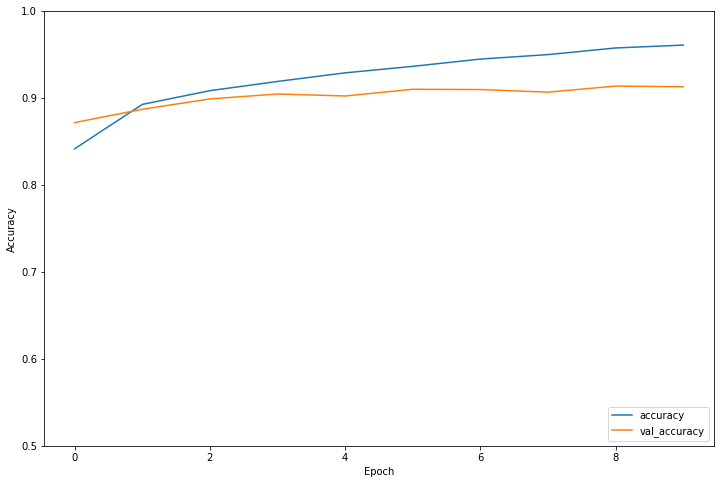

In [8]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')